<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Jennifer_Banks_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












##1) Replicate the lesson code

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# Plot style
plt.style.use('fast')


In [4]:
# List of available styles
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

## Part 1: Built-in Visualization Tools

In [0]:
#Reading Titanic Dataset
#url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

In [49]:
df= pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv')
print(df.shape)
df.head()

(712, 6)


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [50]:
# Categorical Variable, Cabin class
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [51]:
#Categorical Variable
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


Text(0.5, 0, 'fare cost')

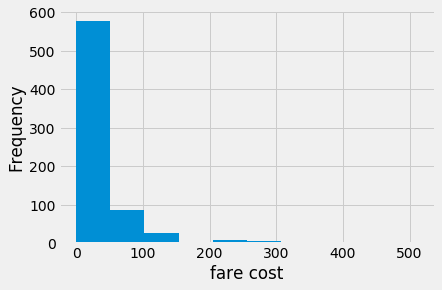

In [52]:
#Continuos variable,Fare
df['Fare'].plot(kind='hist');
plt.xlabel('fare cost')

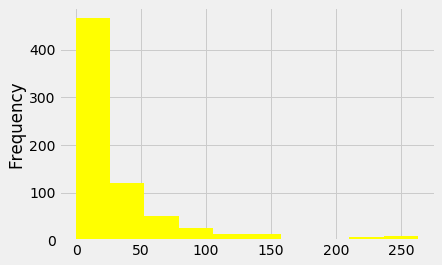

In [53]:
# Removing Outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='yellow')

In [54]:
# Converting Continuous to categorical by binning
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins= farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults=df['fare_groups'].value_counts().sort_index()

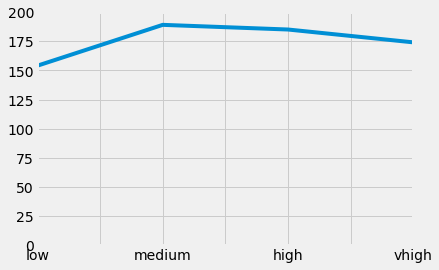

In [56]:
## Display a single continuos variable
myresults.plot(ylim=(0,200));

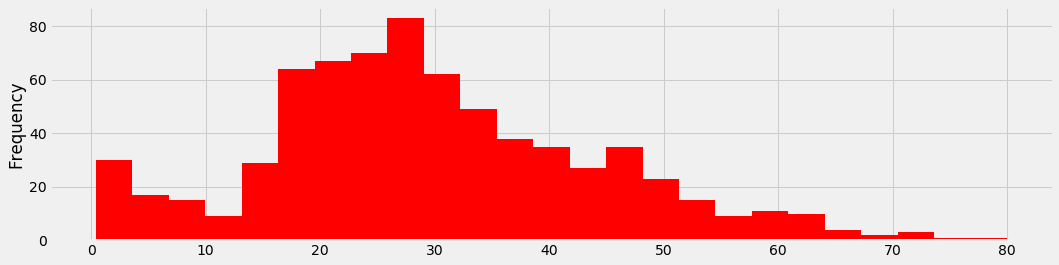

In [58]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='r');

## Stacked Histogram


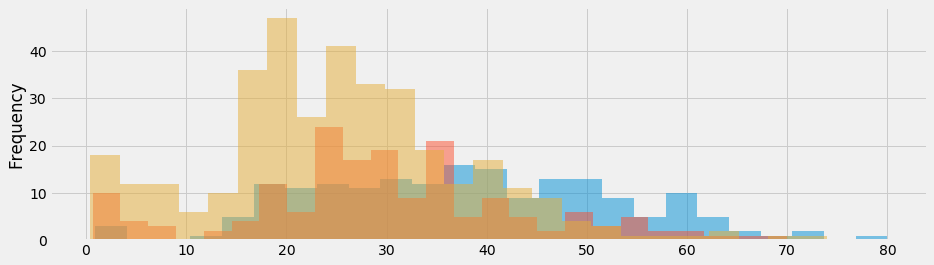

In [59]:
#Stacked Histogram
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4),alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4),alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4),alpha=0.5);

#note: alpha refers to transparency

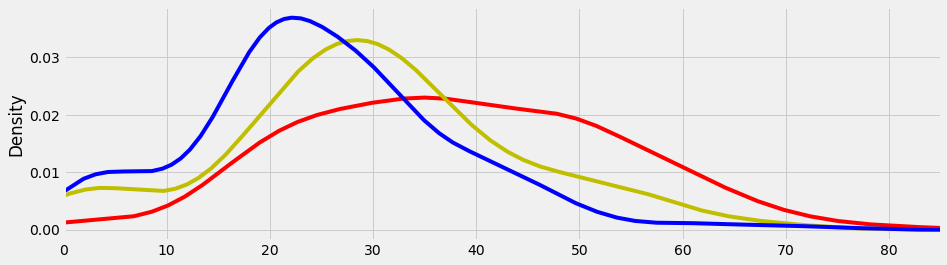

In [60]:
#Kernel Density
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4),color='r');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4),color='y');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4),color='b');

##Display a single categorical variable

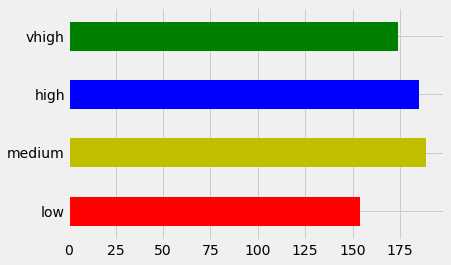

In [61]:
#Bar Chart
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['r','y','b','g']);

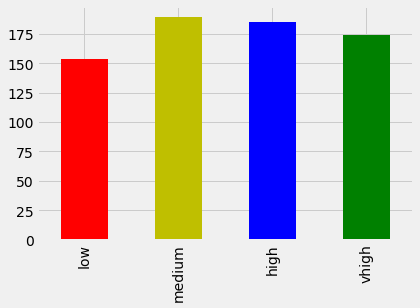

In [62]:
#Bar Chart
df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['r','y','b','g']);

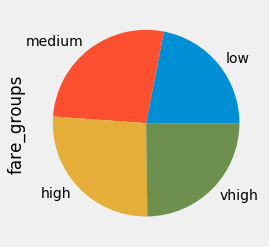

In [63]:
#Pie Chart Plot
df['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(4,4));

##Compare two categorical variables

In [0]:
#cab_survived=pd.crosstab(df['cabin_class'], df['Survived'])
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

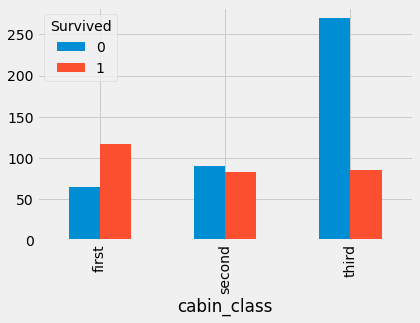

In [173]:
#Bar Plot
cab_survive.plot(kind='bar')

In [0]:
#Crosstab with column percents
#cab_survived2=pd.crosstab(df['cabin_class'],df['Survived'], normalized='index')
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

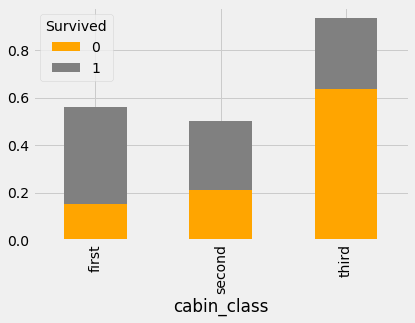

In [67]:
# make a stacked bar chart
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray'])

In [68]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
example

In [0]:
# what styles are available in matplotlib? There's one for 538.
plt.style.available
plt.style.use('fivethirtyeight')

In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

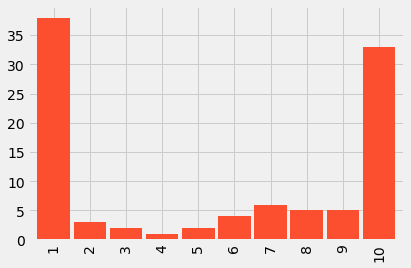

In [27]:
# replicate the figure post
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9)

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [0]:
fake2 = pd.Series(fakelist2)

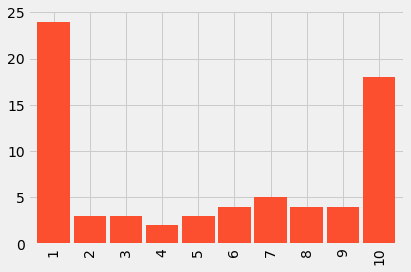

In [73]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

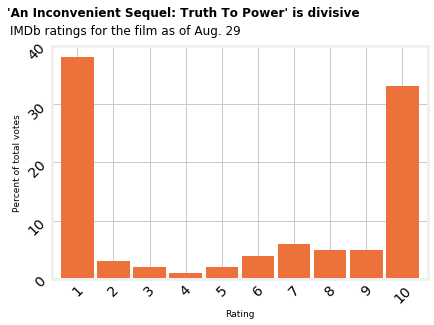

In [74]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,10));

In [75]:
display(example)

##Reproduce with real data

In [0]:
# read the data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [77]:
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [37]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# grab only the rows corresponding to the last day
lastday=df['2017-08-29']

In [81]:
lastday

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0


In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [83]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [84]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [85]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [86]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


##Recreate the fugure

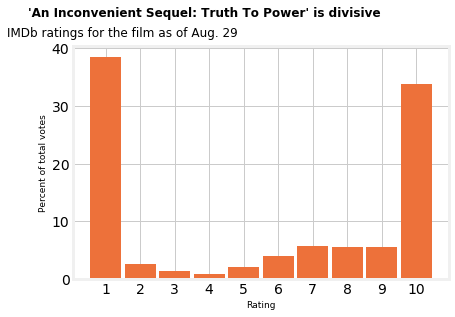

In [87]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

##2) Reproduce another example from FiveThityEight's shared data repository.

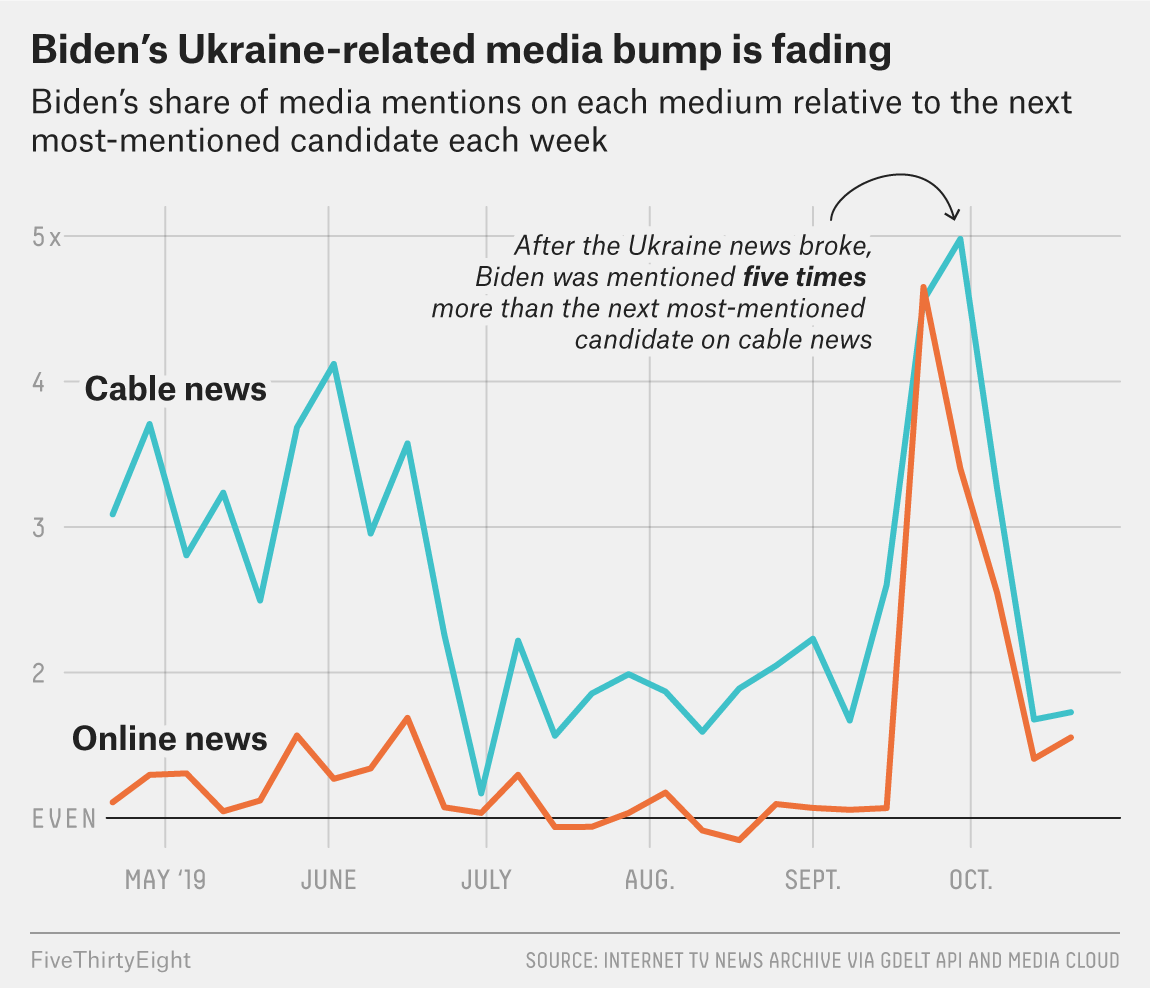

In [510]:
from IPython.display import Image
Image('https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png')

In [776]:
#Reading data
cable_weekly= pd.read_csv('/content/cable_weekly.csv')
pd.options.display.max_rows = 99900
print(df.shape)
cable_weekly.head()

(80053, 26)


,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips,query
0,2018-12-30,Amy Klobuchar,12,1279,76029,0.009382,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
1,2019-01-06,Amy Klobuchar,7,1031,82964,0.006790,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
2,2019-01-13,Amy Klobuchar,45,615,82521,0.073171,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
3,2019-01-20,Amy Klobuchar,10,991,83649,0.010091,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
4,2019-01-27,Amy Klobuchar,16,1914,80994,0.008359,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."


In [777]:
#Dropping unnecessary columns
cable_weekly=cable_weekly.drop(['query'], axis=1)
print(cable_weekly.shape)
cable_weekly.head()

(1008, 6)


,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips
0,2018-12-30,Amy Klobuchar,12,1279,76029,0.009382
1,2019-01-06,Amy Klobuchar,7,1031,82964,0.006790
2,2019-01-13,Amy Klobuchar,45,615,82521,0.073171
3,2019-01-20,Amy Klobuchar,10,991,83649,0.010091
4,2019-01-27,Amy Klobuchar,16,1914,80994,0.008359


In [778]:
# grab only the rows corresponding to Joe Biden and Elizabeth Warren

Biden_Warren_cable=cable_weekly.loc[274:400,:]
print(Biden_Warren_cable.shape)
Biden_Warren_cable.head()


(127, 6)


,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips
274,2019-05-26,Elizabeth Warren,437,3059,95289,0.142857
275,2019-06-02,Elizabeth Warren,414,3103,95313,0.133419
276,2019-06-09,Elizabeth Warren,782,4780,95839,0.163598
277,2019-06-16,Elizabeth Warren,696,4485,96026,0.155184
278,2019-06-23,Elizabeth Warren,1117,7316,96553,0.152679


In [779]:
#Keeping Elizabeth Warren and Joe Biden's data
Biden_Warren_cable=Biden_Warren_cable[Biden_Warren_cable.name!='Jay Inslee']
Biden_Warren_cable=Biden_Warren_cable[Biden_Warren_cable.name!='Eric Swalwell']
print(Biden_Warren_cable.shape)
Biden_Warren_cable.head(3)

(65, 6)


,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips
274,2019-05-26,Elizabeth Warren,437,3059,95289,0.142857
275,2019-06-02,Elizabeth Warren,414,3103,95313,0.133419
276,2019-06-09,Elizabeth Warren,782,4780,95839,0.163598


In [780]:
#Determining all unique candidate entries
Biden_Warren_cable['name'].unique()

array(['Elizabeth Warren', 'Joe Biden'], dtype=object)

In [781]:
#Checking data types
Biden_Warren_cable.dtypes

date                           object
name                           object
matched_clips                   int64
all_candidate_clips             int64
total_clips                     int64
pct_of_all_candidate_clips    float64
dtype: object

In [782]:
#Rename column
Biden_Warren_cable.rename(columns={'pct_of_all_candidate_clips':'percent'}, inplace=True)
print(Biden_Warren_cable.shape)
Biden_Warren_cable.head()

(65, 6)


,date,name,matched_clips,all_candidate_clips,total_clips,percent
274,2019-05-26,Elizabeth Warren,437,3059,95289,0.142857
275,2019-06-02,Elizabeth Warren,414,3103,95313,0.133419
276,2019-06-09,Elizabeth Warren,782,4780,95839,0.163598
277,2019-06-16,Elizabeth Warren,696,4485,96026,0.155184
278,2019-06-23,Elizabeth Warren,1117,7316,96553,0.152679


In [783]:
#Changing to appropriate datetime objects
Biden_Warren_cable['date']=pd.to_datetime(Biden_Warren_cable['date'],infer_datetime_format=True)
df.dtypes[:15]

respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
dtype: object

In [784]:
# New columns month
Biden_Warren_cable['month']= Biden_Warren_cable['date'].dt.month
Biden_Warren_cable



,date,name,matched_clips,all_candidate_clips,total_clips,percent,month
274,2019-05-26,Elizabeth Warren,437,3059,95289,0.142857,5
275,2019-06-02,Elizabeth Warren,414,3103,95313,0.133419,6
276,2019-06-09,Elizabeth Warren,782,4780,95839,0.163598,6
277,2019-06-16,Elizabeth Warren,696,4485,96026,0.155184,6
278,2019-06-23,Elizabeth Warren,1117,7316,96553,0.152679,6
279,2019-06-30,Elizabeth Warren,517,4384,92126,0.117929,6
280,2019-07-07,Elizabeth Warren,400,3052,94299,0.131062,7
281,2019-07-14,Elizabeth Warren,535,3029,94481,0.176626,7
282,2019-07-21,Elizabeth Warren,356,2574,96027,0.138306,7
283,2019-07-28,Elizabeth Warren,1196,7361,95970,0.162478,7


In [785]:
#Reshaping the table
Biden_Warren_cable=Biden_Warren_cable.pivot(index='date', columns='name',values='matched_clips')
print(Biden_Warren_cable.shape)
#Biden_Warren_cable


(43, 2)


In [786]:
#dropping null values, these dates were not included in the graph
Biden_Warren_cable=Biden_Warren_cable.dropna()
print(Biden_Warren_cable.shape)
Biden_Warren_cable

(22, 2)


name,Elizabeth Warren,Joe Biden
date,,
2019-05-26,437.0,1610.0
2019-06-02,414.0,1706.0
2019-06-09,782.0,2642.0
2019-06-16,696.0,2488.0
2019-06-23,1117.0,2771.0
2019-06-30,517.0,1899.0
2019-07-07,400.0,1484.0
2019-07-14,535.0,1155.0
2019-07-21,356.0,1152.0


In [787]:
#Creating a column that computes ratio Biden/Warren
Biden_Warren_cable['Cable Ratio']=Biden_Warren_cable['Joe Biden']/Biden_Warren_cable['Elizabeth Warren']
print(Biden_Warren_cable.shape)
Biden_Warren_cable

(22, 3)


name,Elizabeth Warren,Joe Biden,Cable Ratio
date,,,
2019-05-26,437.0,1610.0,3.684211
2019-06-02,414.0,1706.0,4.120773
2019-06-09,782.0,2642.0,3.378517
2019-06-16,696.0,2488.0,3.574713
2019-06-23,1117.0,2771.0,2.480752
2019-06-30,517.0,1899.0,3.673114
2019-07-07,400.0,1484.0,3.710000
2019-07-14,535.0,1155.0,2.158879
2019-07-21,356.0,1152.0,3.235955


In [788]:
Biden_Warren_cable=Biden_Warren_cable.drop(['Joe Biden', 'Elizabeth Warren'], axis=1)
Biden_Warren_cable

name,Cable Ratio
date,
2019-05-26,3.684211
2019-06-02,4.120773
2019-06-09,3.378517
2019-06-16,3.574713
2019-06-23,2.480752
2019-06-30,3.673114
2019-07-07,3.710000
2019-07-14,2.158879
2019-07-21,3.235955


In [789]:
#Reading data
online__weekly= pd.read_csv('/content/online_weekly.csv')
print(df.shape)
online__weekly.head()

(80053, 26)


,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
0,2018-12-30,Amy Klobuchar,45.0,806,0.055831,"(""Amy Klobuchar"")"
1,2019-01-06,Amy Klobuchar,55.0,915,0.060109,"(""Amy Klobuchar"")"
2,2019-01-13,Amy Klobuchar,128.0,1052,0.121673,"(""Amy Klobuchar"")"
3,2019-01-20,Amy Klobuchar,55.0,1024,0.053711,"(""Amy Klobuchar"")"
4,2019-01-27,Amy Klobuchar,74.0,1605,0.046106,"(""Amy Klobuchar"")"


In [764]:
#Dropping unnecessary columns
online__weekly=online__weekly.drop(['query'], axis=1)
print(online__weekly.shape)
online__weekly.head()


(1008, 5)


,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories
0,2018-12-30,Amy Klobuchar,45.0,806,0.055831
1,2019-01-06,Amy Klobuchar,55.0,915,0.060109
2,2019-01-13,Amy Klobuchar,128.0,1052,0.121673
3,2019-01-20,Amy Klobuchar,55.0,1024,0.053711
4,2019-01-27,Amy Klobuchar,74.0,1605,0.046106


In [790]:
# grab only the rows corresponding to Joe Biden and Elizabeth Warren

Biden_Warren_online=online__weekly.loc[274:400,:]
print(Biden_Warren_online.shape)
Biden_Warren_online.head(3)


(127, 6)


,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
274,2019-05-26,Elizabeth Warren,429.0,1474,0.291045,"(""Elizabeth Warren"")"
275,2019-06-02,Elizabeth Warren,592.0,1652,0.358354,"(""Elizabeth Warren"")"
276,2019-06-09,Elizabeth Warren,719.0,2049,0.350903,"(""Elizabeth Warren"")"


In [791]:
#Keeping Elizabeth Warren and Joe Biden's data
Biden_Warren_online=Biden_Warren_online[Biden_Warren_online.name!='Jay Inslee']
Biden_Warren_online=Biden_Warren_online[Biden_Warren_online.name!='Eric Swalwell']
print(Biden_Warren_online.shape)
Biden_Warren_online.head(3)

(65, 6)


,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
274,2019-05-26,Elizabeth Warren,429.0,1474,0.291045,"(""Elizabeth Warren"")"
275,2019-06-02,Elizabeth Warren,592.0,1652,0.358354,"(""Elizabeth Warren"")"
276,2019-06-09,Elizabeth Warren,719.0,2049,0.350903,"(""Elizabeth Warren"")"


In [792]:
#Rename column
Biden_Warren_online.rename(columns={'pct_of_all_candidate_stories':'percent'}, inplace=True)
print(Biden_Warren_online.shape)
Biden_Warren_online.head()

(65, 6)


,date,name,matched_stories,all_candidate_stories,percent,query
274,2019-05-26,Elizabeth Warren,429.0,1474,0.291045,"(""Elizabeth Warren"")"
275,2019-06-02,Elizabeth Warren,592.0,1652,0.358354,"(""Elizabeth Warren"")"
276,2019-06-09,Elizabeth Warren,719.0,2049,0.350903,"(""Elizabeth Warren"")"
277,2019-06-16,Elizabeth Warren,585.0,1882,0.310840,"(""Elizabeth Warren"")"
278,2019-06-23,Elizabeth Warren,1470.0,3561,0.412805,"(""Elizabeth Warren"")"


In [793]:
#Changing to appropriate datetime objects
Biden_Warren_online['date']=pd.to_datetime(Biden_Warren_online['date'],infer_datetime_format=True)
df.dtypes[:15]

respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
dtype: object

In [794]:
# New columns month
Biden_Warren_online['month']= Biden_Warren_online['date'].dt.month
Biden_Warren_online

,date,name,matched_stories,all_candidate_stories,percent,query,month
274,2019-05-26,Elizabeth Warren,429.0,1474,0.291045,"(""Elizabeth Warren"")",5
275,2019-06-02,Elizabeth Warren,592.0,1652,0.358354,"(""Elizabeth Warren"")",6
276,2019-06-09,Elizabeth Warren,719.0,2049,0.350903,"(""Elizabeth Warren"")",6
277,2019-06-16,Elizabeth Warren,585.0,1882,0.310840,"(""Elizabeth Warren"")",6
278,2019-06-23,Elizabeth Warren,1470.0,3561,0.412805,"(""Elizabeth Warren"")",6
279,2019-06-30,Elizabeth Warren,509.0,1672,0.304426,"(""Elizabeth Warren"")",6
280,2019-07-07,Elizabeth Warren,581.0,1880,0.309043,"(""Elizabeth Warren"")",7
281,2019-07-14,Elizabeth Warren,693.0,1802,0.384573,"(""Elizabeth Warren"")",7
282,2019-07-21,Elizabeth Warren,489.0,1414,0.345827,"(""Elizabeth Warren"")",7
283,2019-07-28,Elizabeth Warren,1217.0,3210,0.379128,"(""Elizabeth Warren"")",7


In [795]:
#Reshaping the table
Biden_Warren_online=Biden_Warren_online.pivot(index='date', columns='name',values='matched_stories')
print(Biden_Warren_online.shape)
Biden_Warren_online

(43, 2)


name,Elizabeth Warren,Joe Biden
date,,
2018-12-30,NaN,158.0
2019-01-06,NaN,162.0
2019-01-13,NaN,117.0
2019-01-20,NaN,186.0
2019-01-27,NaN,222.0
2019-02-03,NaN,196.0
2019-02-10,NaN,184.0
2019-02-17,NaN,210.0
2019-02-24,NaN,199.0


In [796]:
#dropping null values, these dates were not included in the graph
Biden_Warren_online=Biden_Warren_online.dropna()
print(Biden_Warren_online.shape)
Biden_Warren_online

(22, 2)


name,Elizabeth Warren,Joe Biden
date,,
2019-05-26,429.0,672.0
2019-06-02,592.0,751.0
2019-06-09,719.0,1036.0
2019-06-16,585.0,1038.0
2019-06-23,1470.0,1577.0
2019-06-30,509.0,783.0
2019-07-07,581.0,753.0
2019-07-14,693.0,669.0
2019-07-21,489.0,459.0


In [797]:
#Creating a column that computes ratio Biden/Warren
Biden_Warren_online['Online Ratio']=Biden_Warren_online['Joe Biden']/Biden_Warren_online['Elizabeth Warren']
print(Biden_Warren_online.shape)
Biden_Warren_online

(22, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


name,Elizabeth Warren,Joe Biden,Online Ratio
date,,,
2019-05-26,429.0,672.0,1.566434
2019-06-02,592.0,751.0,1.268581
2019-06-09,719.0,1036.0,1.440890
2019-06-16,585.0,1038.0,1.774359
2019-06-23,1470.0,1577.0,1.072789
2019-06-30,509.0,783.0,1.538310
2019-07-07,581.0,753.0,1.296041
2019-07-14,693.0,669.0,0.965368
2019-07-21,489.0,459.0,0.938650


In [798]:
Biden_Warren_online=Biden_Warren_online.drop(['Joe Biden', 'Elizabeth Warren'], axis=1)
Biden_Warren_online

name,Online Ratio
date,
2019-05-26,1.566434
2019-06-02,1.268581
2019-06-09,1.440890
2019-06-16,1.774359
2019-06-23,1.072789
2019-06-30,1.538310
2019-07-07,1.296041
2019-07-14,0.965368
2019-07-21,0.938650


In [799]:
#Concatenating two DFs
frames=[Biden_Warren_cable,Biden_Warren_online]
Cable_Online=pd.concat(frames, axis=1)
print(Cable_Online.shape)
Cable_Online

(22, 2)


name,Cable Ratio,Online Ratio
date,,
2019-05-26,3.684211,1.566434
2019-06-02,4.120773,1.268581
2019-06-09,3.378517,1.440890
2019-06-16,3.574713,1.774359
2019-06-23,2.480752,1.072789
2019-06-30,3.673114,1.538310
2019-07-07,3.710000,1.296041
2019-07-14,2.158879,0.965368
2019-07-21,3.235955,0.938650


In [0]:
import matplotlib.image as mpimg

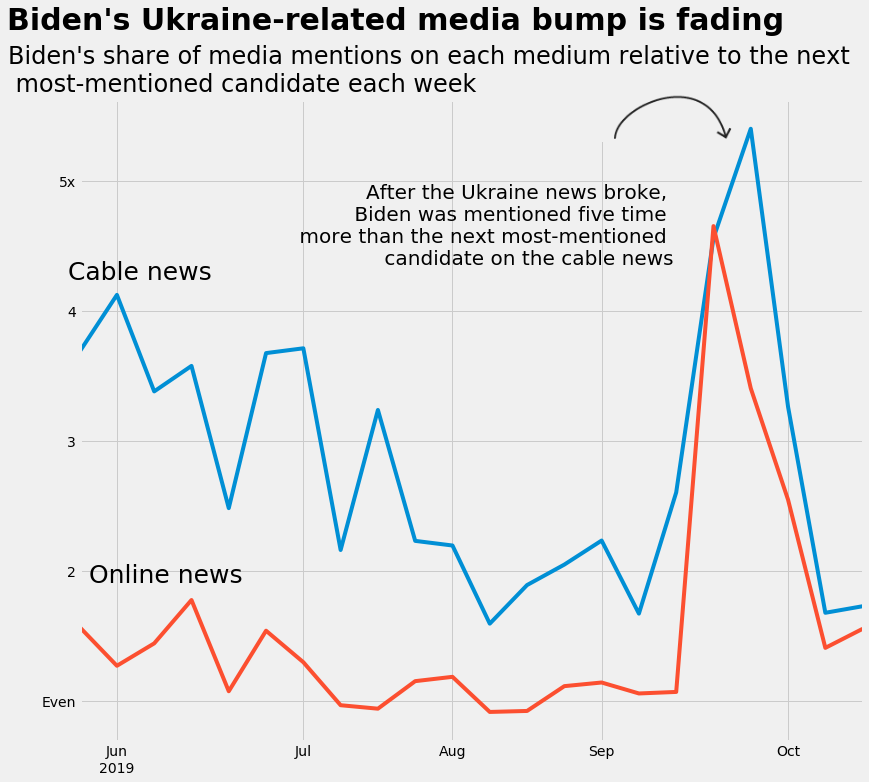

In [993]:
# Main Plot
Cable_Online.plot(legend=False, figsize=(12.5,11));

# Title
plt.title("Biden's Ukraine-related media bump is fading", ha= 'right', size = 30, x=.9, y=1.1,fontweight='bold')

#Removing X label
plt.xlabel('')

#Adding subtitle
plt.suptitle("Biden's share of media mentions on each medium relative to the next \n most-mentioned candidate each week ", x=0, y=.95, ha = 'left', size= 24)

#Adding text
plt.text(0.28, 2.1,'Cable news', ha='center', va='center', transform=ax.transAxes, fontsize=25)
plt.text(0.35, .8,'Online news', ha='center', va='center', transform=ax.transAxes, fontsize=25)
plt.text(1.7, 2.3,'After the Ukraine news broke, \n Biden was mentioned five time \n more than the next most-mentioned \n candidate on the cable news', ha='right', va='center', transform=ax.transAxes, fontsize=20)

logo = plt.imread('/content/arrow.PNG')
plt.figimage(logo, 600, 640, alpha=2, zorder=1)

#Editing Yticks
plt.yticks(np.arange(1,6),('Even', '2', '3', '4', '5x'));



# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here